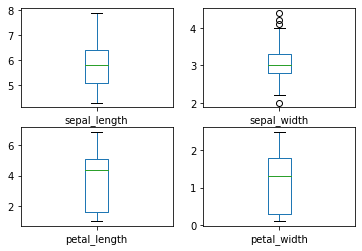

C:\Users\arun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\arun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\arun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\arun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\arun\Anaconda3\lib\site-package

LR: 0.958333 (0.041667)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)
0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



C:\Users\arun\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\arun\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\arun\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\arun\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

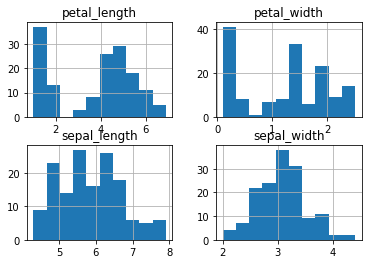

In [2]:
#Applied Machine learning
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
r=pd.read_csv("C:/Users/arun/Desktop/ITRAIN/itrain python/Basic/iris.csv")
r.head() #to check the first 10 rows of the data set
r.tail() #to check out last 10 row of the data set
r.describe() #to give a statistical summary about the dataset
r.sample(5) #pops up 5 random rows from the data set 
r.isnull().sum() #checks out how many null info are on the dataset
#plot
r.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()
#Histogram
r.hist()
# Split-out validation dataset
array = r.values
X = array[:,0:4] #Extractig only independent variable
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
#We have splited the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.
#Test harness
seed=7
scoring='accuracy'
#Building Models
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
 
 
#OUTPUT 
# LR: 0.958333 (0.041667)
#LDA: 0.975000 (0.038188)
#KNN: 0.983333 (0.033333)
#CART: 0.983333 (0.033333)
#NB: 0.975000 (0.053359)
#SVM: 0.991667 (0.025000)
 
 # Make predictions on validation dataset #Evaluate 
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(metrics.accuracy_score(Y_validation, predictions))
print(metrics.confusion_matrix(Y_validation, predictions))
print(metrics.classification_report(Y_validation, predictions))

In [ ]:
#Predict if the loan application will get approved

#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#Load dataset
url = "https://raw.githubusercontent.com/callxpert/datasets/master/Loan-applicant-details.csv"
names = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
dataset = pd.read_csv(url, names=names)
print(dataset.head(20))
#convert all our categorical variables into numeric by encoding the categories.
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    dataset[i] = le.fit_transform(dataset[i])
#Splitting the Data set
array = dataset.values
X = array[:,6:11]
Y=Y.astype('int')
Y = array[:,12]
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)
x_train=x_train.astype('int')
x_train
y_train=y_train.astype('int')
y_train
x_test=x_test.astype('int')
x_test
y_test=y_test.astype('int')
y_test
#Evaluating the model and training the Model
#Logistics Regression
l = LogisticRegression()
l.fit(x_train,y_train)
predictions = l.predict(x_test)
print(accuracy_score(y_test, predictions))
#Decison TRee
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

#So, Regression algorithm works fine for our use case